In [16]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Reading both Training and Testing file separately....
df_test_flight=pd.read_excel("flights_Test_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"],infer_datetime_format=True)
df_train_flight=pd.read_excel("flights_Data_Train.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"],infer_datetime_format=True)
#creating a column dataset in both test and train dataset which contains values of test and train so that we can use them later when do modelling.
df_train_flight["dataset"]="train"
df_test_flight["dataset"]="test"

In the given flightticket Dateset Several Parameters are given and based on those parameters I infer that: 
A) We have to predict the price of the ticket
B) Features: 

 1 Airline: The name of the airline.

 2.Date_of_Journey: The date of the journey

 3.Source: The source from which the service begins.

 4.Destination: The destination where the service ends.
 
 5.Route: The route taken by the flight to reach the destination.

 6.Dep_Time: The time when the journey starts from the source.

 7.Arrival_Time: Time of arrival at the destination.

 8.Duration: Total duration of the flight.

 9.Total_Stops: Total stops between the source and destination.

 10.Additional_Info: Additional information about the flight
C) Target:(Price)The price of the ticket.                                                                               
D) As our Target value is continuous thus i will use Regression Models.
E)Our dataset is divided into two sets:
    Size of training set: 10683 records
    Size of test set: 2671 records



# Data Exploration (exploratory data analysis or EDA)


In [18]:
#combining the dataset
df=df_train_flight.append(df_test_flight)
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-04-30 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-04-30 13:15:00,2019-05-01,2020-04-30 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-06-09,2020-04-30 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-04-30 23:30:00,2019-05-12,2020-04-30 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-04-30 21:35:00,2019-03-01,2020-04-30 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-04-30 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
2667,No info,IndiGo,2020-04-30 16:55:00,2019-03-27,2020-04-30 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
2668,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-04-30 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
2669,No info,Air India,2020-04-30 19:15:00,2019-06-03,2020-04-30 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [19]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-04-30 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-04-30 13:15:00,2019-05-01,2020-04-30 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-06-09,2020-04-30 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-04-30 23:30:00,2019-05-12,2020-04-30 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-04-30 21:35:00,2019-03-01,2020-04-30 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
5,No info,SpiceJet,2020-04-30 11:25:00,2019-06-24,2020-04-30 09:00:00,Banglore,2h 25m,3873.0,CCU → BLR,Kolkata,non-stop,train
6,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-03-12,2020-04-30 18:55:00,New Delhi,15h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
7,No info,Jet Airways,2020-03-02 05:05:00,2019-03-01,2020-04-30 08:00:00,New Delhi,21h 5m,22270.0,BLR → BOM → DEL,Banglore,1 stop,train
8,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-03-12,2020-04-30 08:55:00,New Delhi,25h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
9,No info,Multiple carriers,2020-04-30 19:15:00,2019-05-27,2020-04-30 11:25:00,Cochin,7h 50m,8625.0,DEL → BOM → COK,Delhi,1 stop,train


In [20]:
#To check the shape of the dataset
df.shape # (rows, columns)

(13354, 12)

In [21]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null datetime64[ns]
Date_of_Journey    13354 non-null datetime64[ns]
Dep_Time           13354 non-null datetime64[ns]
Destination        13354 non-null object
Duration           13354 non-null object
Price              10683 non-null float64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dataset            13354 non-null object
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 1.3+ MB


According to the information collected:                                                              
1) null Data  present                                                  
2) Object Type=10                                                      
3) Float Type= 1                                                                
4) Int Type= 0                                                                     

In [22]:
# Are there any missing values?
df.isna().sum()


Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dataset               0
dtype: int64

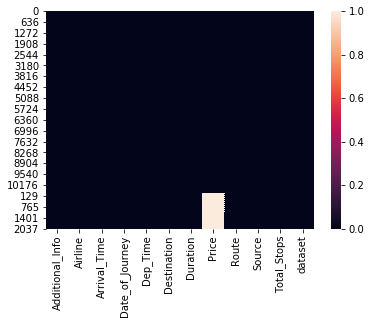

In [23]:
#heatmap for null values
sns.heatmap(df.isnull())

In [24]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values246



In [25]:
#drop duplictes values
df.drop_duplicates(inplace=True)

In [26]:
#checking shape of dataset
df.shape

(13108, 12)

In [27]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of Additional_Info : 10
number of unique valuse of Airline : 12
number of unique valuse of Arrival_Time : 1451
number of unique valuse of Date_of_Journey : 56
number of unique valuse of Dep_Time : 223
number of unique valuse of Destination : 6
number of unique valuse of Duration : 374
number of unique valuse of Price : 1870
number of unique valuse of Route : 132
number of unique valuse of Source : 5
number of unique valuse of Total_Stops : 5
number of unique valuse of dataset : 2


In [28]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [29]:
#calculating total and percentage of all objects fields
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------Additional_Info-------------------------
                              total   percent
No info                       10309  0.786466
In-flight meal not included    2366  0.180500
No check-in baggage included    394  0.030058
1 Long layover                   20  0.001526
Change airports                   8  0.000610
Business class                    5  0.000381
No Info                           3  0.000229
1 Short layover                   1  0.000076
2 Long layover                    1  0.000076
Red-eye flight                    1  0.000076


--------------------Airline-------------------------
                                   total   percent
Jet Airways                         4586  0.349863
IndiGo                              2552  0.194690
Air India                           2127  0.162267
Multiple carriers                   1539  0.117409
SpiceJet                            1023  0.078044
Vistara                              607  0.046308
Air Asia             

# Feature Generation

In [30]:
# Now here I'm finding the travel duration difference between arrival and departure...
x=(df["Arrival_Time"]-df["Dep_Time"])
duration_list=list()
for i in range(len(x)):
    dur=x.iloc[i].seconds/3600
    duration_list.append(dur)
df["Duration"]=duration_list

In [31]:
#Lets check the  duration column
df["Duration"]

0        2.833333
1        7.416667
2       19.000000
3        5.416667
4        4.750000
          ...    
2666    23.916667
2667     2.583333
2668     6.583333
2669    15.250000
2670    14.333333
Name: Duration, Length: 13108, dtype: float64

In [32]:
# Dropping the Arrival Time
df.drop(columns=["Arrival_Time"],inplace=True)

In [33]:
#          Now We can split the Dep_Time  given in slots like: Late Night, Early Morning, 
#        Morning, Afternoon, Evening, Night into new column feature time_of_day
df["time_of_day"]=np.where((df["Dep_Time"].dt.hour>=0)&(df["Dep_Time"].dt.hour<=2),"Late Night",np.where((df["Dep_Time"].dt.hour>=3)&(df["Dep_Time"].dt.hour<=7),"Early Morning",np.where((df["Dep_Time"].dt.hour>=8)&(df["Dep_Time"].dt.hour<=11),"Morning",np.where((df["Dep_Time"].dt.hour>=12)&(df["Dep_Time"].dt.hour<=16),"Afternoon",np.where((df["Dep_Time"].dt.hour>=17)&(df["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [34]:
#Using Simple Imputer to impute the NaN values of Total_Stops and Route fields
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan,strategy='most_frequent' )
df['Total_Stops']=imp1.fit_transform(df['Total_Stops'].values.reshape(-1,1))
df['Route']=imp1.fit_transform(df['Route'].values.reshape(-1,1))

In [35]:
#checking missing values
df.isna().sum()


Additional_Info       0
Airline               0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2645
Route                 0
Source                0
Total_Stops           0
dataset               0
time_of_day           0
dtype: int64

In [36]:
#In (4 stops) in Total_Stops flights has more price in mean terms
df['Price'].groupby(df['Total_Stops']).mean()


Total_Stops
1 stop      10593.570032
2 stops     12761.099393
3 stops     13260.674419
4 stops     17686.000000
non-stop     5018.506763
Name: Price, dtype: float64

In [37]:
#Replacing the values of '1 stop', 'non-stop', '2 stops', '3 stops', '4 stops' into 1, 0, 2, 3, 4 and then convert it into int type
df.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],[1, 0, 2, 3, 4], inplace=True)
df["Total_Stops"] = df["Total_Stops"].astype(int)

In [38]:
#Lets again check the value counts of all objects to extract features
for col in cat_col.index:
        print(df[col].value_counts())
        print()

No info                         10309
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

Jet Airways                          4586
IndiGo                               2552
Air India                            2127
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               607
Air Asia                              405
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Cochin       5473
Banglore     3567
Delhi        1

In [39]:
# Extracting features from Route
#          In this i'm defining Different routes which will specify that at which location flight
#                    will travel and location where it will take layovers...
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]
df['Route_6']=df['Route'].str.split('→ ').str[5]
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset,time_of_day,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,No info,IndiGo,2019-03-24,2020-04-30 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,0,train,Night,BLR,DEL,NaN,NaN,NaN,NaN
1,No info,Air India,2019-05-01,2020-04-30 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2,train,Early Morning,CCU,IXR,BBI,BLR,NaN,NaN
2,No info,Jet Airways,2019-06-09,2020-04-30 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2,train,Morning,DEL,LKO,BOM,COK,NaN,NaN
3,No info,IndiGo,2019-05-12,2020-04-30 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1,train,Evening,CCU,NAG,BLR,NaN,NaN,NaN
4,No info,IndiGo,2019-03-01,2020-04-30 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1,train,Afternoon,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,2019-06-06,2020-04-30 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1,test,Night,CCU,DEL,BLR,NaN,NaN,NaN
2667,No info,IndiGo,2019-03-27,2020-04-30 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,0,test,Afternoon,CCU,BLR,NaN,NaN,NaN,NaN
2668,No info,Jet Airways,2019-06-03,2020-04-30 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1,test,Night,DEL,BOM,COK,NaN,NaN,NaN
2669,No info,Air India,2019-06-03,2020-04-30 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1,test,Early Morning,DEL,BOM,COK,NaN,NaN,NaN


In [40]:
#filling nan values with None using fillna()
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)
df['Route_6'].fillna("None",inplace=True)

In [41]:
#     Now from the Feature 'Date_of_Journey' ectracting new Features:"isWeekend", "Day_of_Week" , "Day_Of_Journey", 
#                   "Month_of_Journey"  which will tell  us whether the day is weekend or not,
#                              it will tell the month and the day name....
df["isWeekend"] = ((pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df["Day_of_Week"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df["Day_Of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df["Month_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.month

In [42]:
# Mean Encoding
#Airline
print("Mean Encoding of Airline",df.groupby('Airline')['Price'].mean())
#Source
print("Mean Encoding of Source",df.groupby('Source')['Price'].mean())
#Destination
print("Mean Encoding of Destination",df.groupby('Destination')['Price'].mean())
#Total_Stops
print("Mean Encoding of Total_Stops",df.groupby('Total_Stops')['Price'].mean())
#Additional_Info
print("Mean Encoding of Additional_Info",df.groupby('Additional_Info')['Price'].mean())
#isWeekend
print("Mean Encoding of isWeekend",df.groupby('isWeekend')['Price'].mean())


Mean Encoding of Airline Airline
Air Asia                              5590.260188
Air India                             9555.382891
GoAir                                 5861.056701
IndiGo                                5668.469897
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4335.841718
Trujet                                4140.000000
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Name: Price, dtype: float64
Mean Encoding of Source Source
Banglore     8022.872877
Chennai      4789.892388
Delhi       10460.914634
Kolkata      9143.083566
Mumbai       5059.708752
Name: Price, dtype: float64
Mean Encoding of Destination Destination
Banglore      9143.083566
Cochin       10460.914634
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata   

# Univariate  Analysis


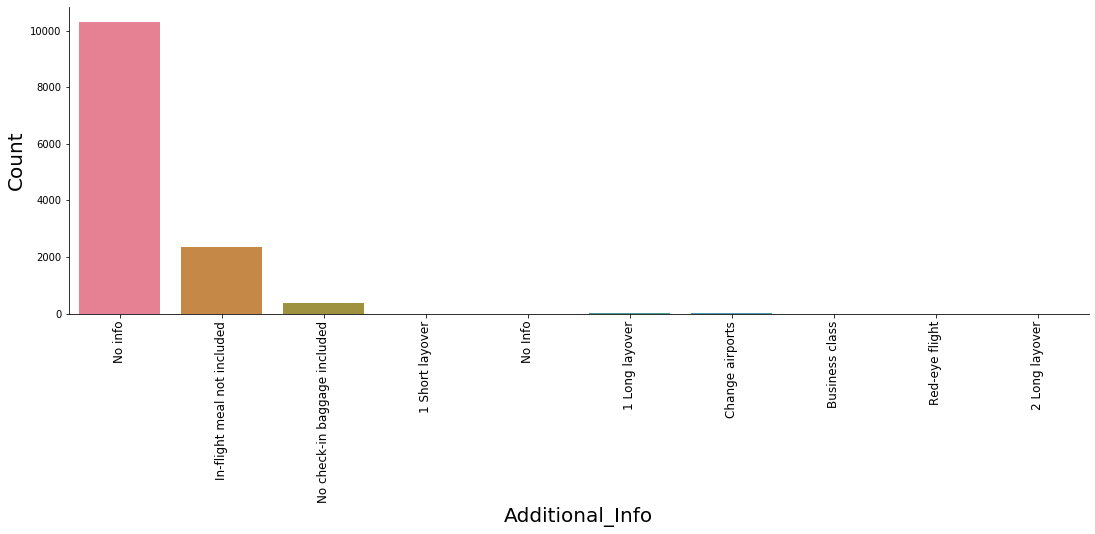

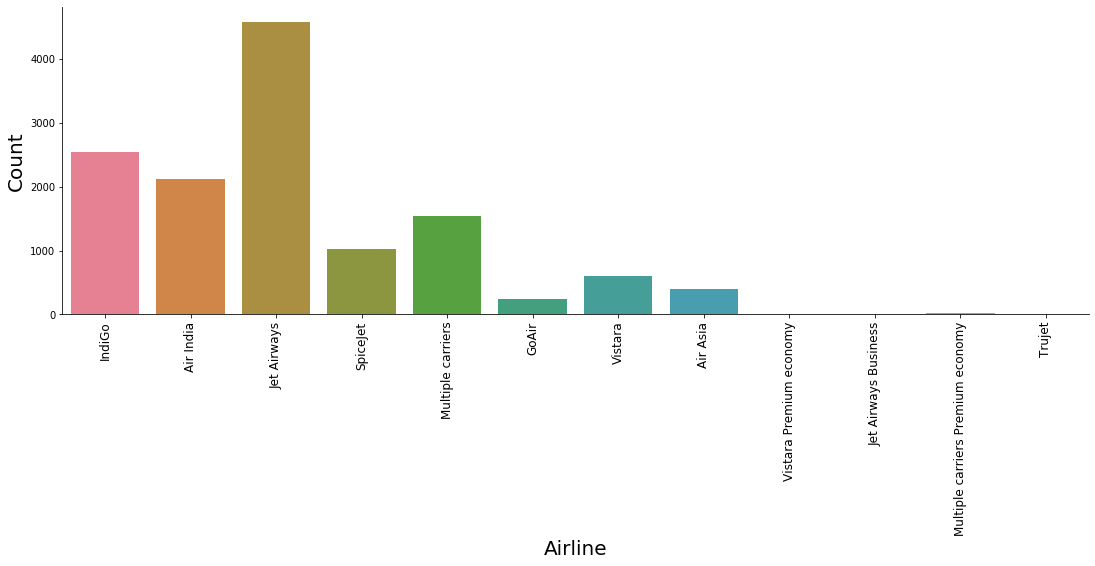

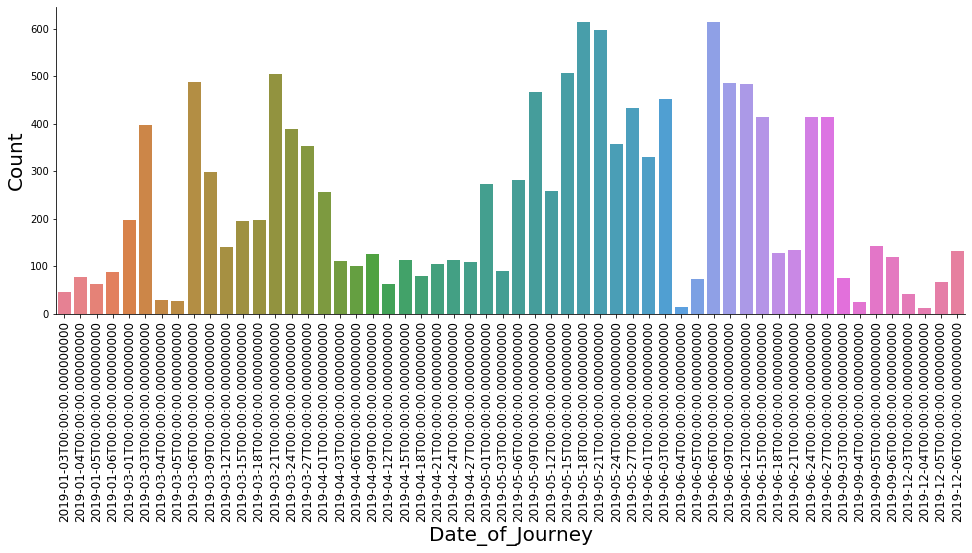

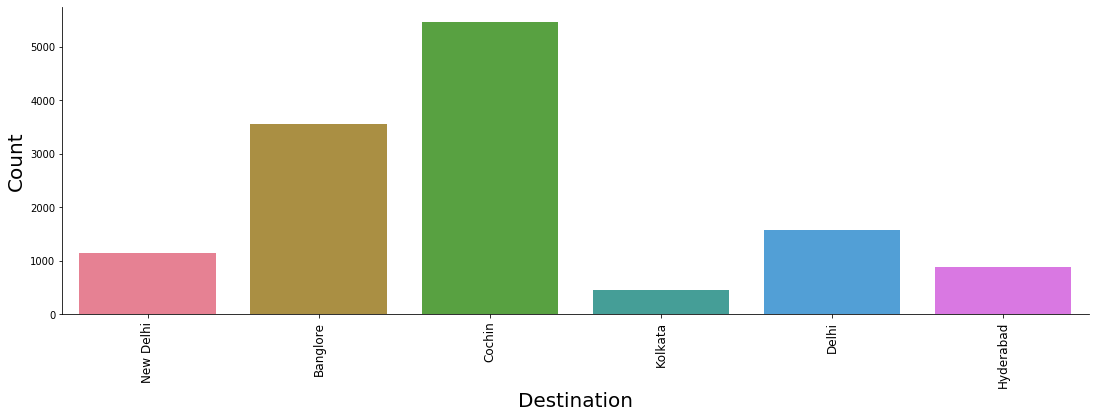

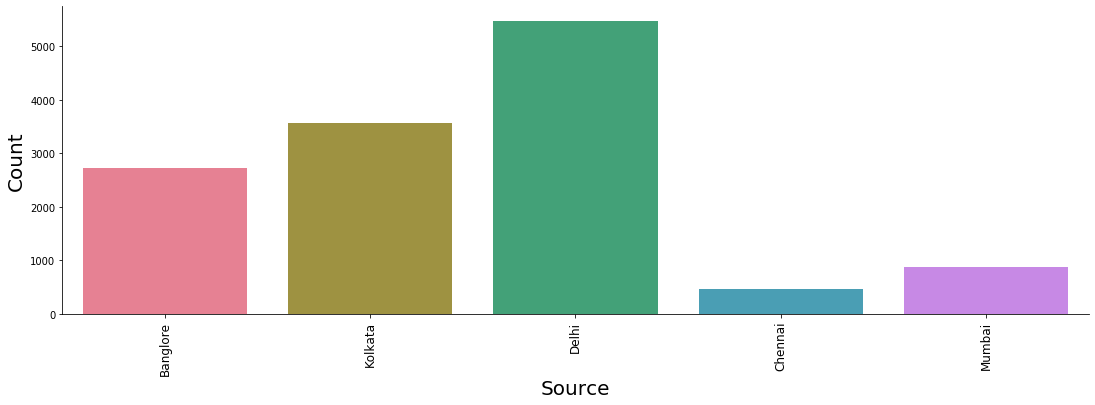

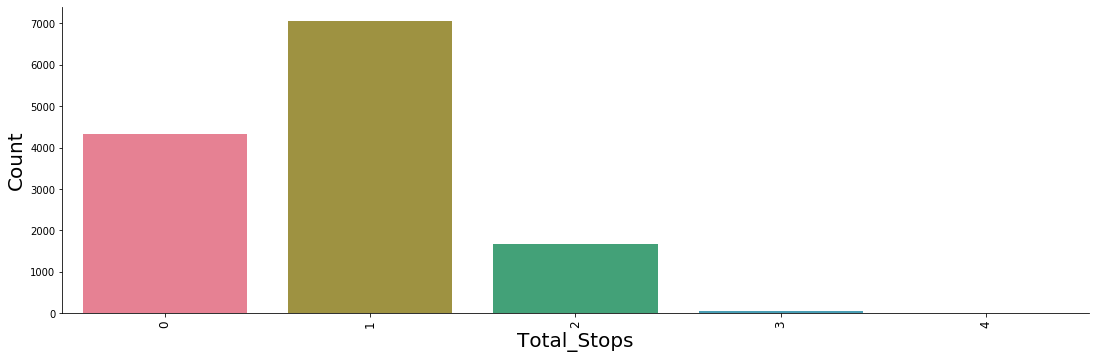

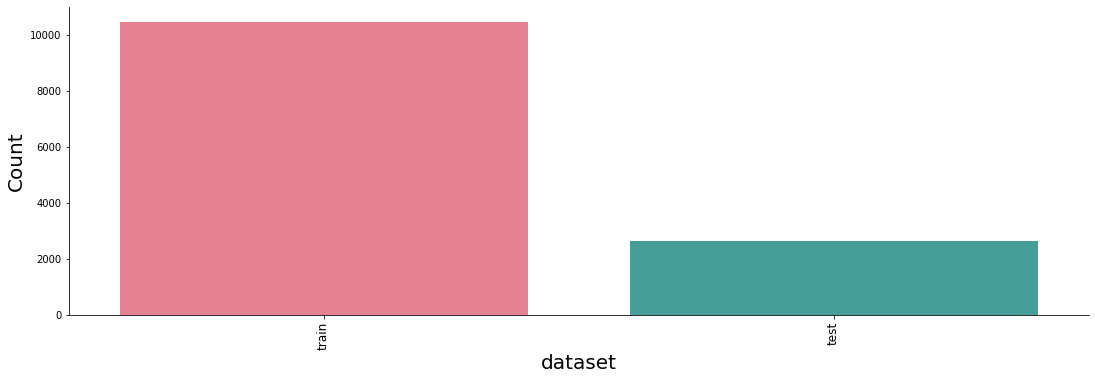

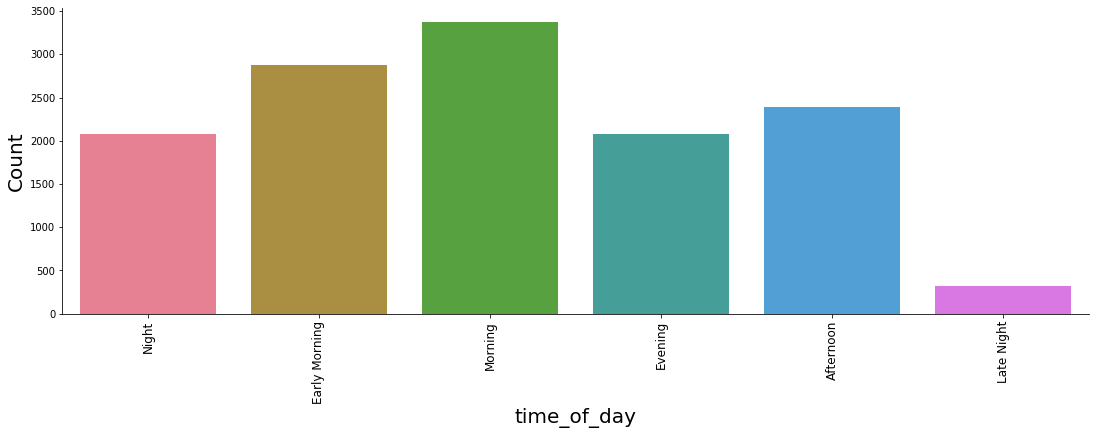

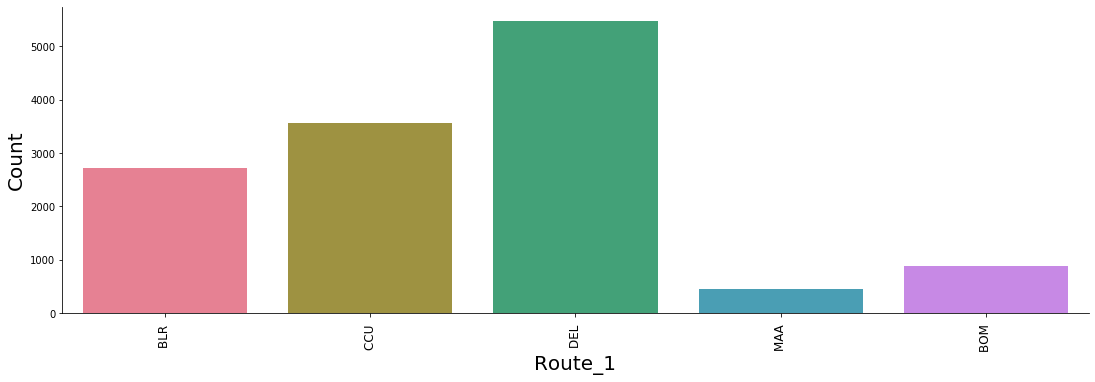

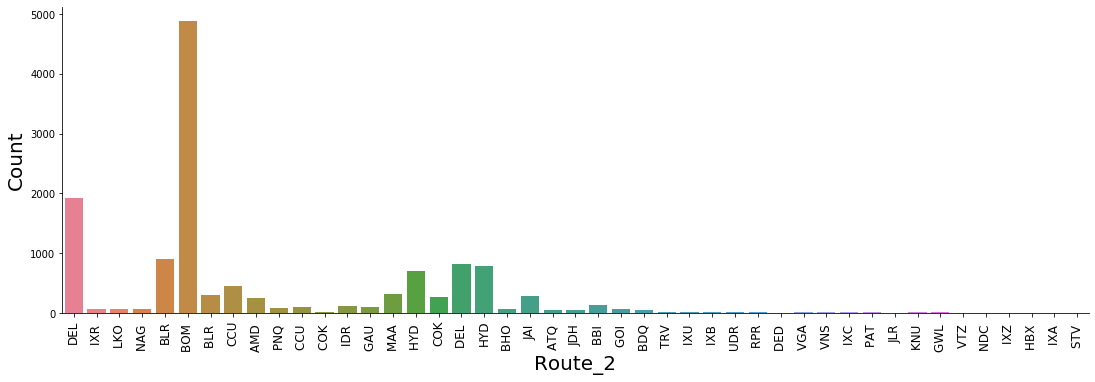

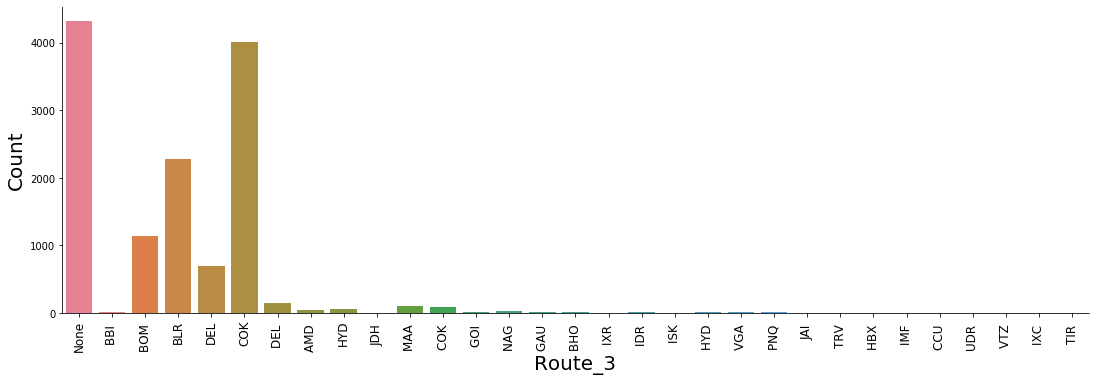

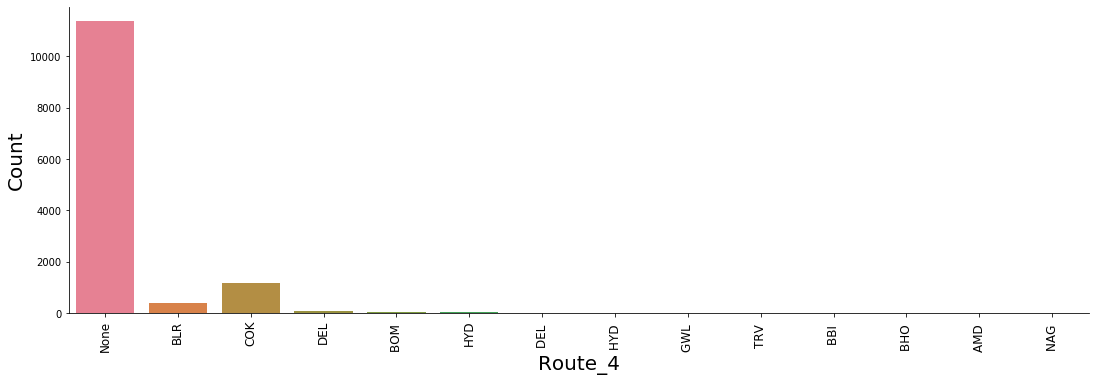

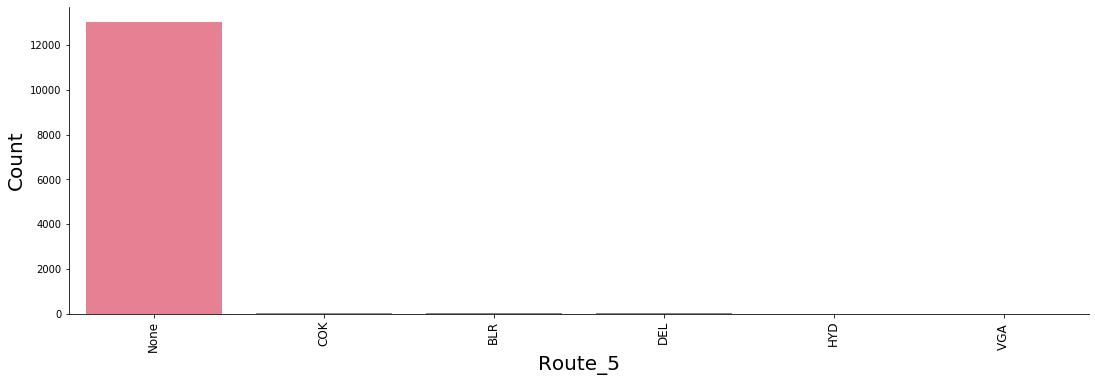

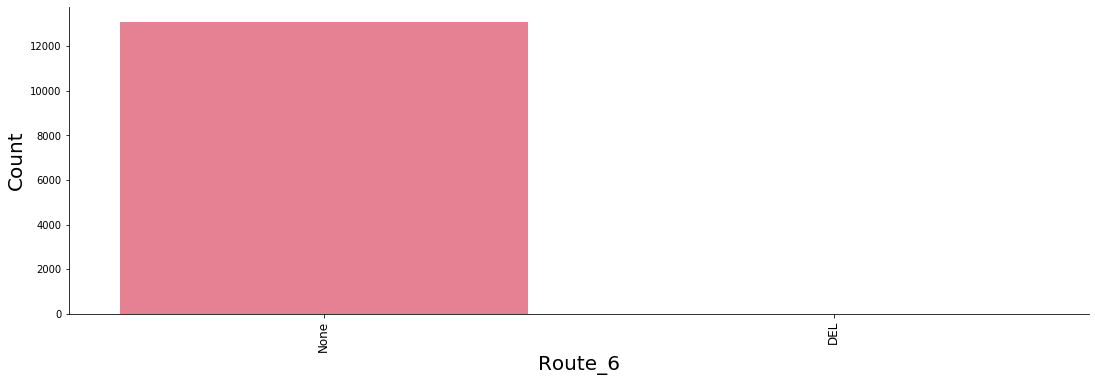

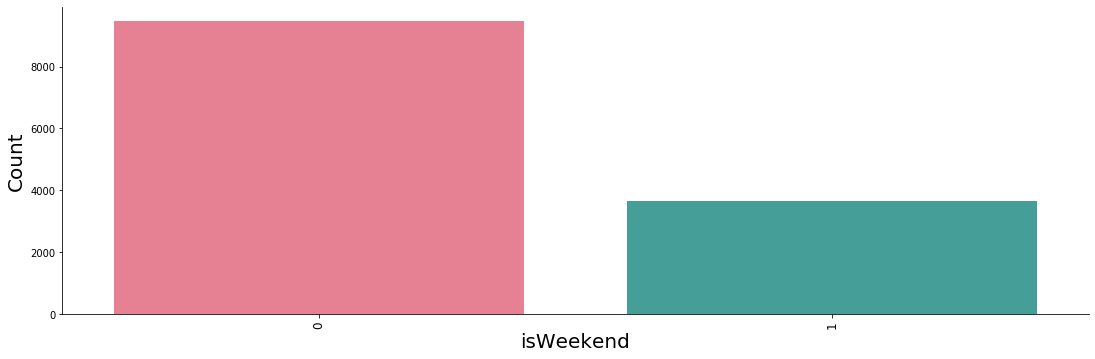

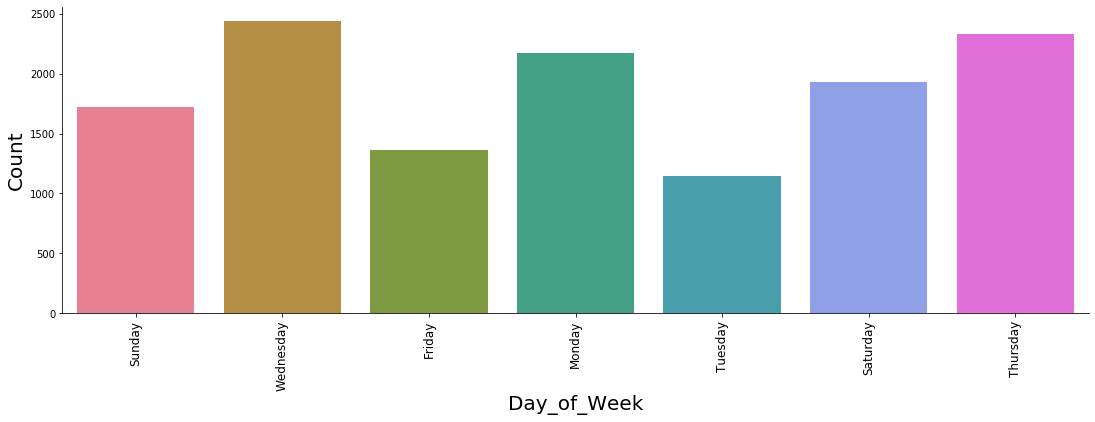

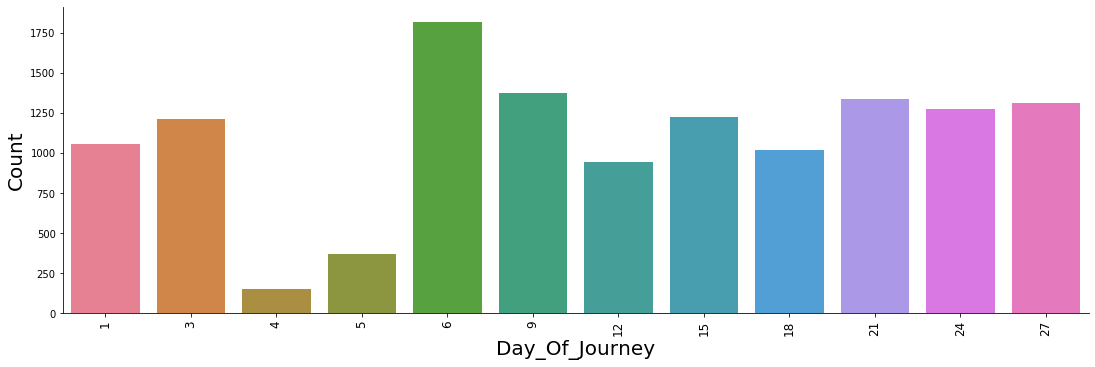

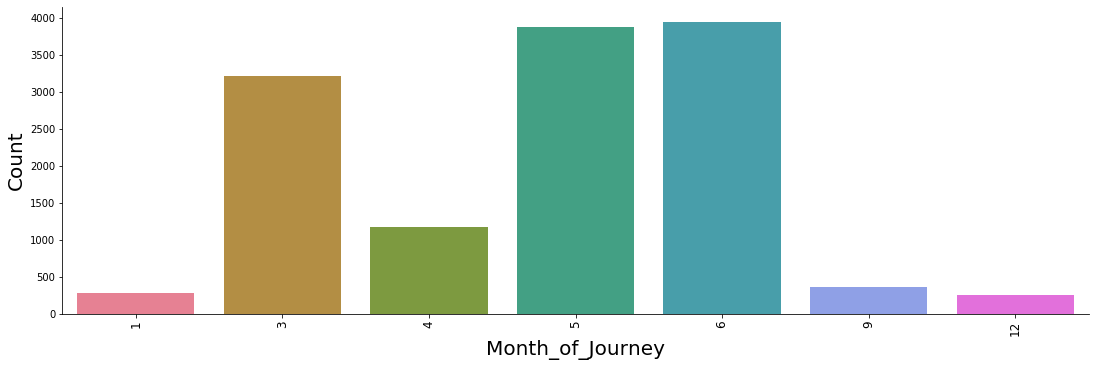

In [43]:
# For loop to plot counting Graph of Different Features.....
for i in df.drop(['Price','Dep_Time','Duration','Route'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graphs

1) Jet Airways are preferred over others by passengers for travelling.
2) Maximum Journeys are taken place on 6th December,2019
3) Number of counts of Flights Where Destination is Cochin are more.
4) Number of counts of Flights where source is Delhi is more.
5) Number of counts of Flights having only 1 stop are more.
6) Most number of flights are during Morning slot.
7) During Weekdays more number of flights runs.
8) Thursday is the most busiest day for flights.

Text(0.5, 6.800000000000011, 'Month_of_Journey')

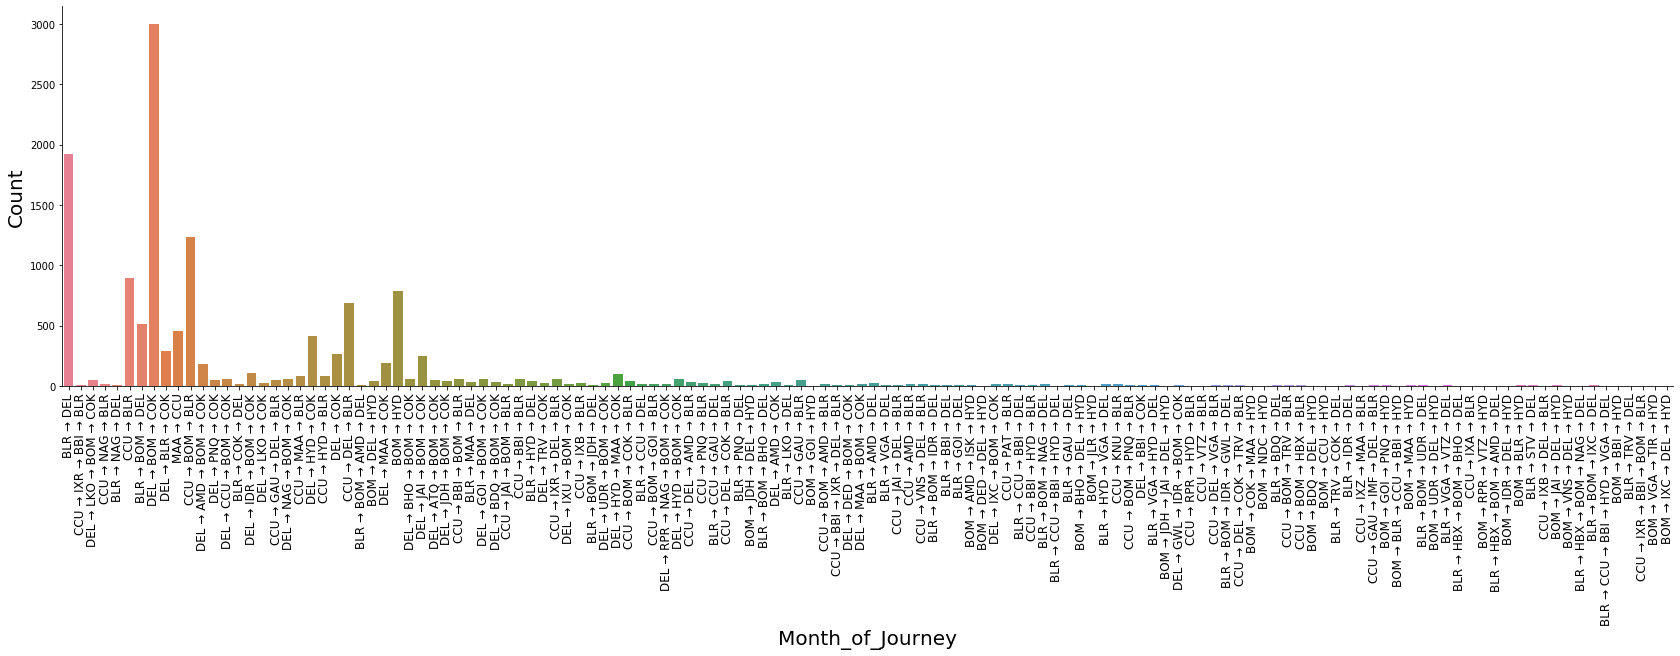

In [44]:
# Graph between Different flight routes count
sns.catplot(x='Route',
                data=df,
                kind='count',
                height=6,
                aspect=4,
                palette='husl')
plt.xticks(rotation=90,fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=20)
plt.xlabel(i,fontsize=20)

Information from the graph:
1) Delhi to cochin via Bombay are more flights.
2) After that flights from Banglore to Delhi are more

# Bivariate Analysis

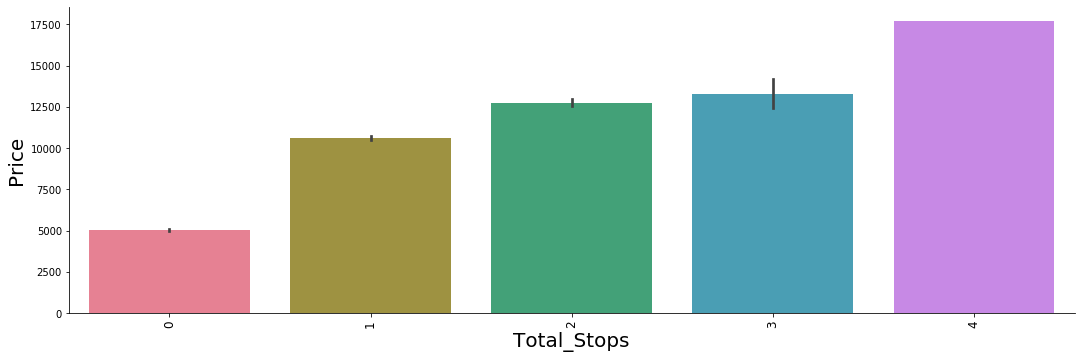

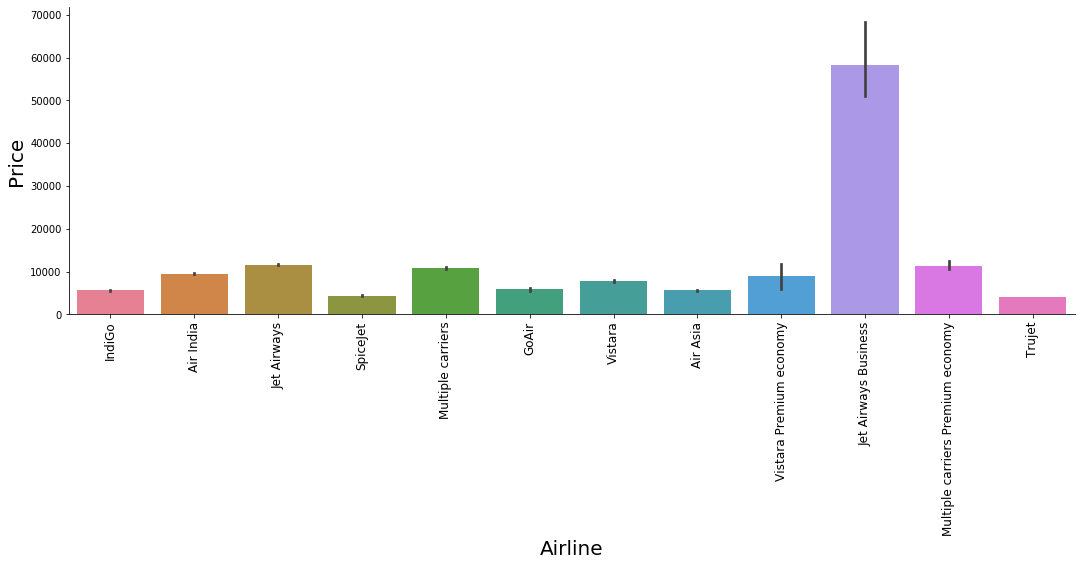

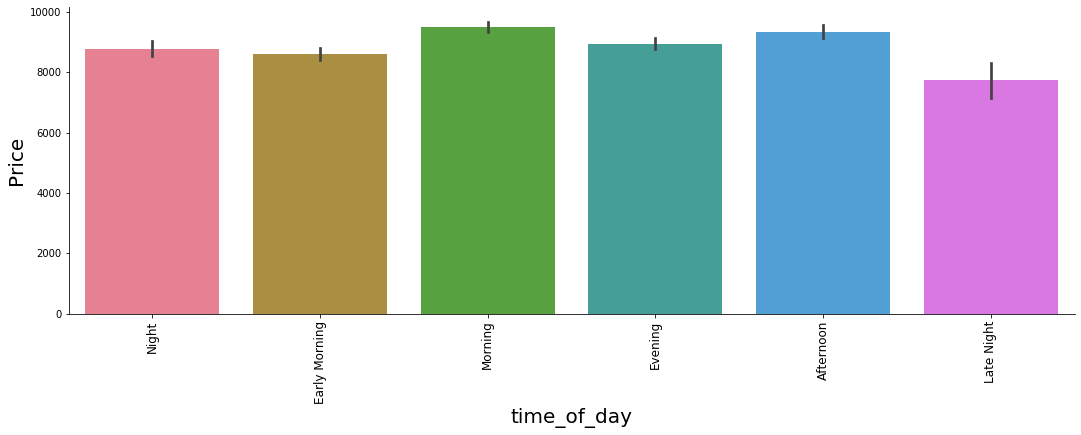

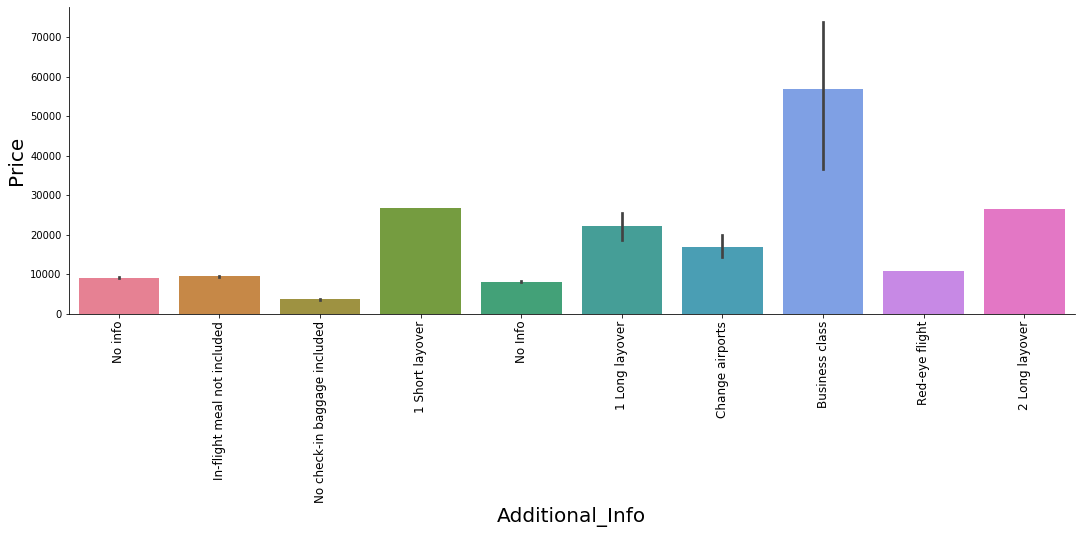

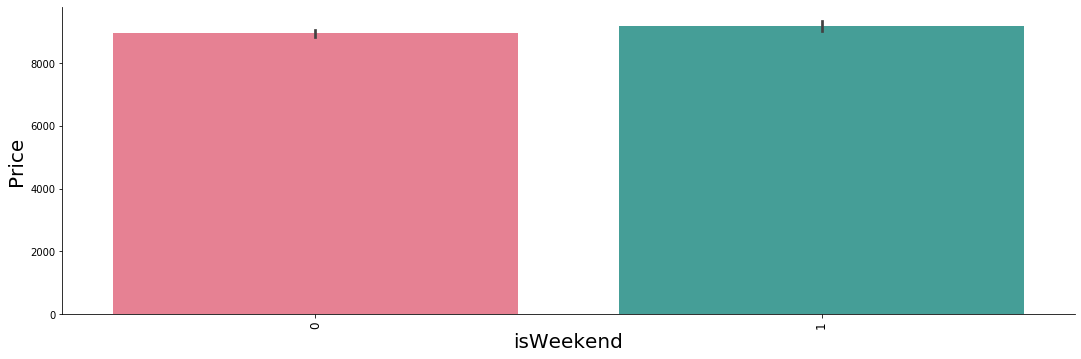

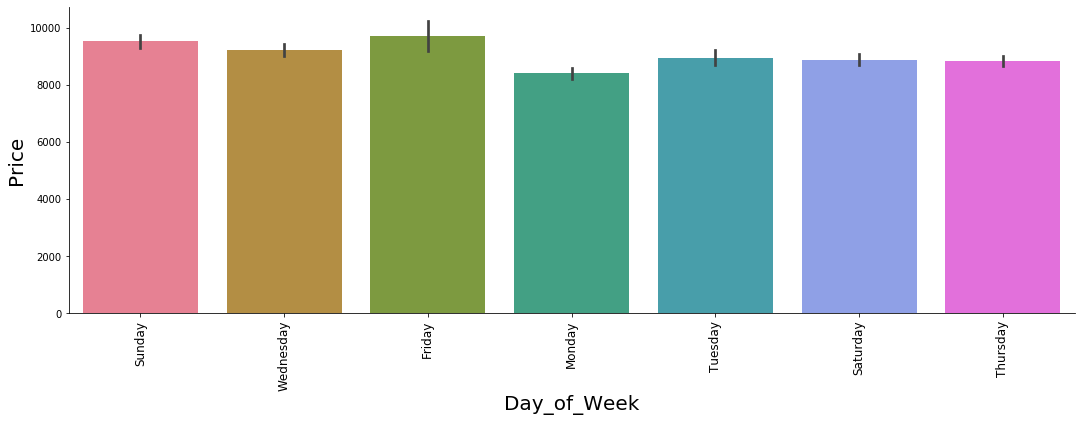

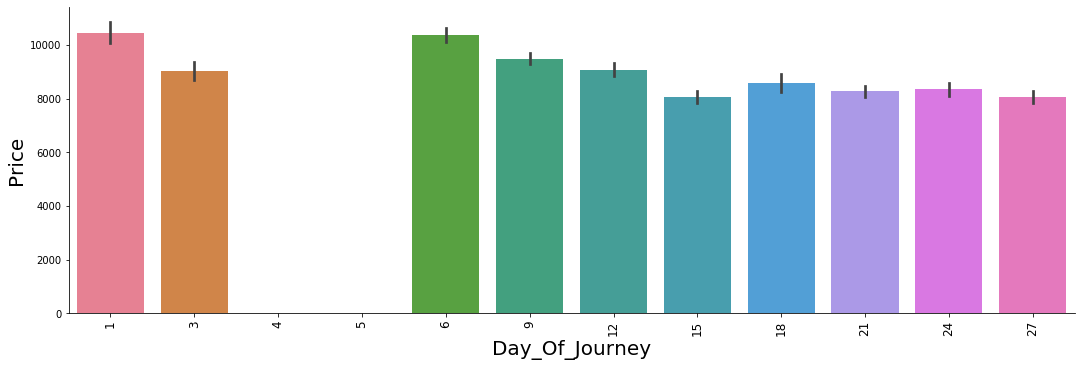

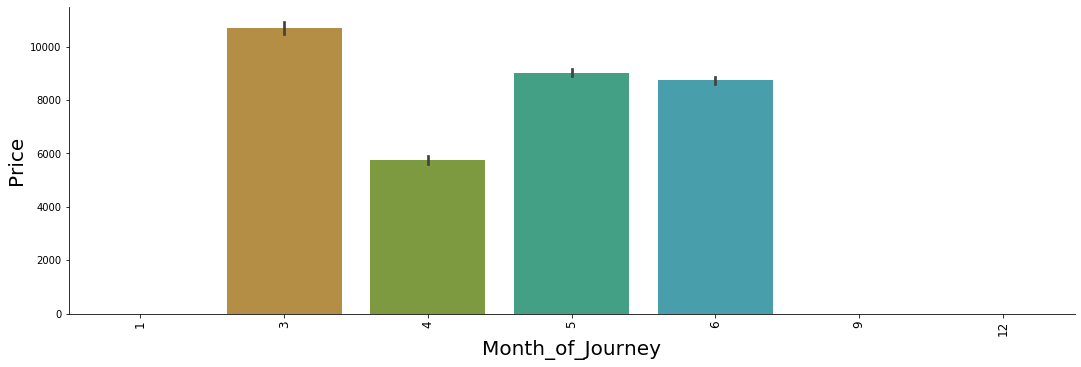

In [45]:
# for loop to plot graph between Flight Price and rest Features('Total_Stops','Airline','time_of_day','Additional_Info','isWeekend',
         # 'Day_of_Week','Day_Of_Journey','Month_of_Journey')...
for i in ['Total_Stops','Airline','time_of_day','Additional_Info','isWeekend',
          'Day_of_Week','Day_Of_Journey','Month_of_Journey']:
    sns.catplot(x=i,
                data=df,
                y='Price',
                height=5,
                aspect=3,
                palette='husl',
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Price',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph                      

1) More the number of stops more is the flight price.
2) Jet Airways Buisness have more number of flight price.
3) Morning flights have more price.
4) Buisness class have more flight price.
5) Thursday and sunday have more flights thus price is also more.
6) January month have costlier flights.
7) BOM-JDH-Del-HYD and BOM-DED-DEL-HYD have highest price.

Text(0.5, 6.79999999999999, 'Duration')

<Figure size 720x360 with 0 Axes>

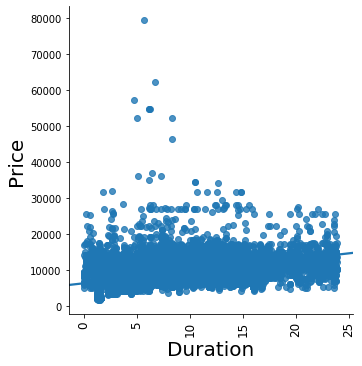

In [46]:
# Graph between Duration of flight and their price...
plt.figure(figsize=(10,5))
sns.lmplot(x='Duration',
                data=df,
                y='Price',
                 )
plt.xticks(rotation=90,fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Duration',fontsize=20)

Information from the graph:¶
1) As Duration of the flight increases the price also increases

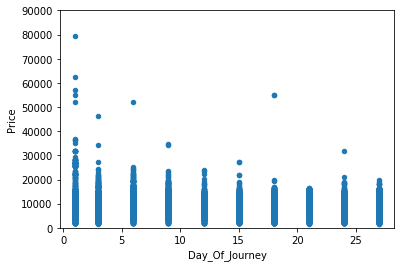

In [47]:
#scatter plot Day_Of_Journey/Price
var = 'Day_Of_Journey'
df.plot.scatter(x=var, y='Price', ylim=(0,90000));


Price of flight is more in starting of the month.

In [48]:
#dropping 'Dep_Time','Date_of_Journey','Route'
df.drop(['Dep_Time','Date_of_Journey','Route'],axis=1,inplace=True)


In [49]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
cat_col = df.dtypes[df.dtypes == 'object']

from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in cat_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,8,3,5,2.833333,3897.0,0,0,1,5,0,13,24,12,4,1,1,3,24,3
1,8,1,0,7.416667,7662.0,3,2,1,1,2,25,1,3,4,1,0,6,1,5
2,8,4,1,19.000000,13882.0,2,2,1,4,3,32,4,5,4,1,1,3,9,6
3,8,3,0,5.416667,6218.0,3,1,1,2,2,34,3,12,4,1,1,3,12,5
4,8,3,5,4.750000,13302.0,0,1,1,0,0,34,8,12,4,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,8,1,0,23.916667,NaN,3,1,0,5,2,14,3,12,4,1,0,4,6,6
2667,8,3,0,2.583333,NaN,3,0,0,0,2,5,24,12,4,1,0,6,27,3
2668,8,4,1,6.583333,NaN,2,1,0,5,3,7,6,12,4,1,0,1,3,6
2669,8,1,1,15.250000,NaN,2,1,0,1,3,7,6,12,4,1,0,1,3,6


In [50]:
#lets remove the skewness
for i in df.drop(['Price'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])
df.skew()

Additional_Info     -1.580897
Airline              0.367117
Destination          0.277135
Duration            -0.018394
Price                1.857641
Source              -0.420657
Total_Stops          0.331956
dataset             -1.486293
time_of_day          0.072085
Route_1              0.252063
Route_2              0.683521
Route_3              0.206558
Route_4             -2.218532
Route_5            -15.345474
Route_6            -80.947512
isWeekend            0.988622
Day_of_Week          0.025173
Day_Of_Journey       0.194549
Month_of_Journey    -0.494750
dtype: float64

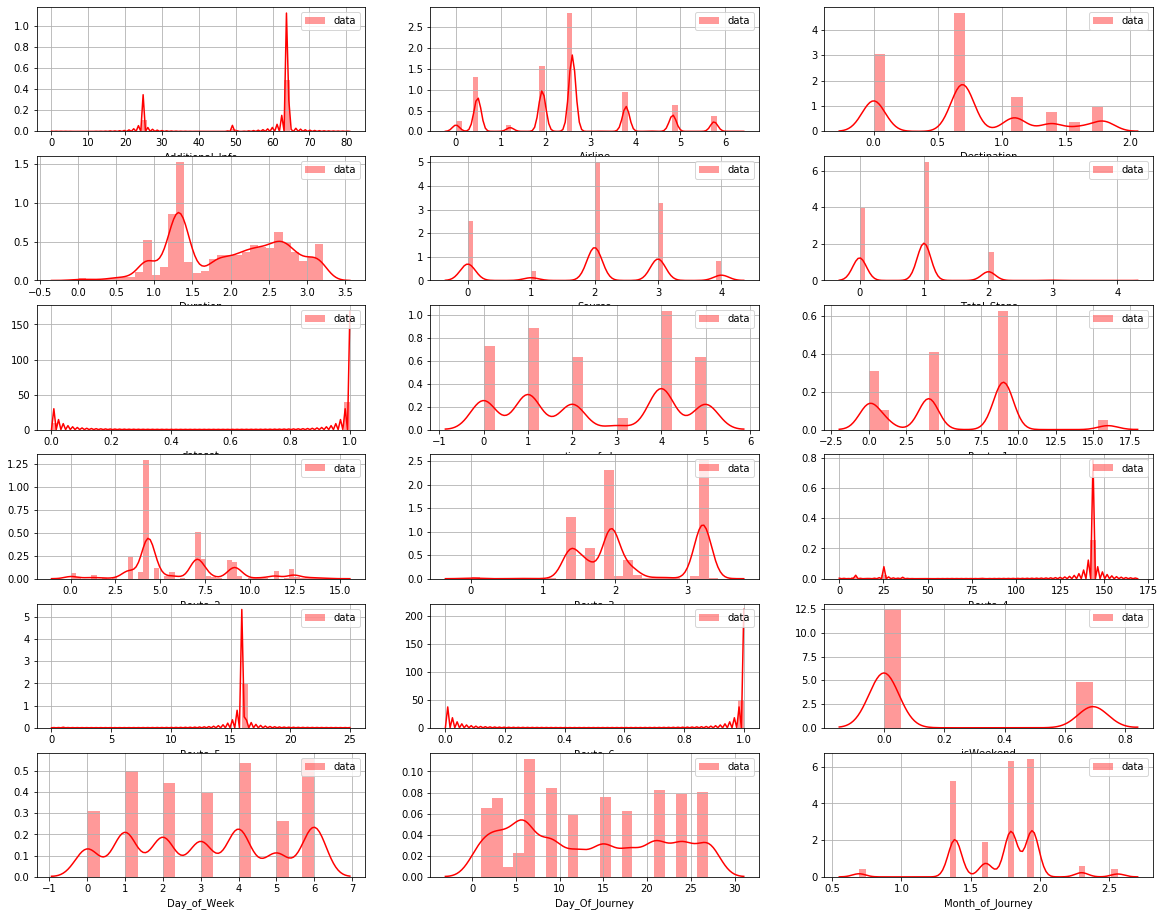

In [51]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.drop(['Price'],axis=1).columns.values)):
    plt.subplot(6,3,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

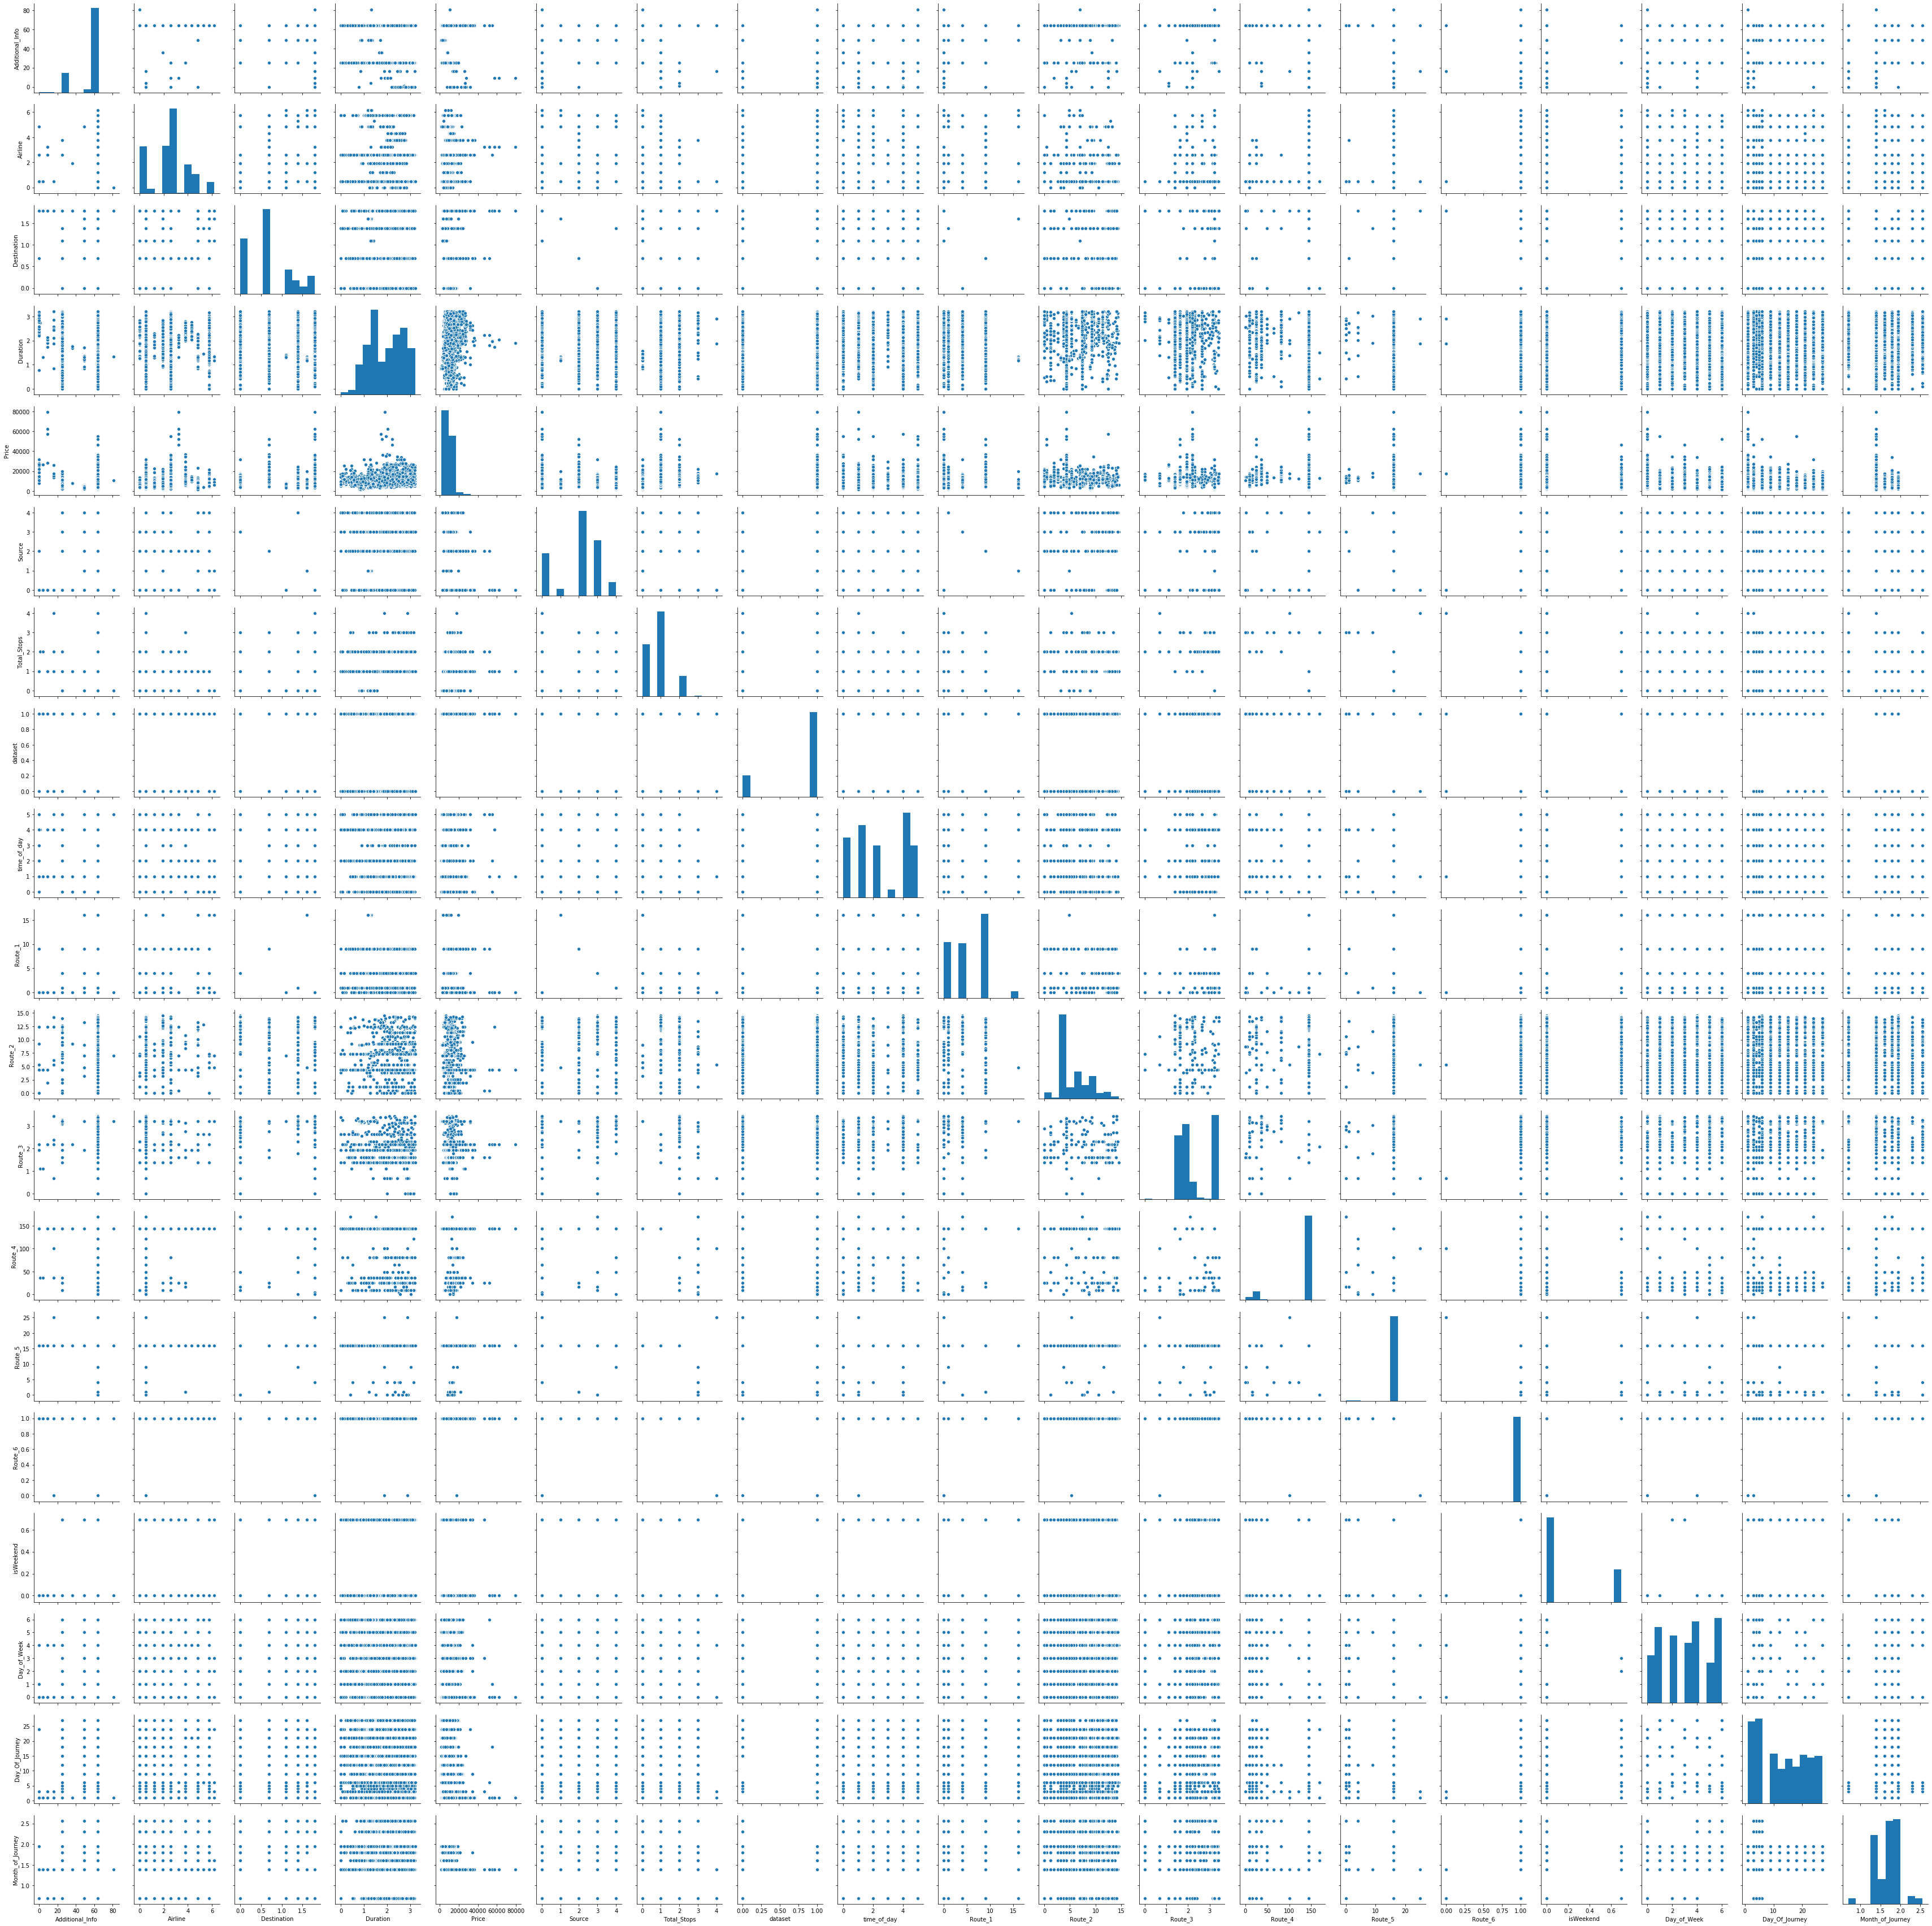

In [52]:
#lets draw pairplot
sns.pairplot(df)

In [53]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
Additional_Info,1,-0.098,0.051,-0.13,-0.049,-0.03,-0.071,-0.022,-0.024,0.035,0.094,0.17,-0.054,-0.033,0.013,0.016,0.015,-0.026,-0.032
Airline,-0.098,1,0.027,-0.054,-0.016,-0.015,-0.2,-0.0076,0.039,0.065,-0.057,0.037,0.28,0.058,0.017,-0.013,0.009,0.023,0.022
Destination,0.051,0.027,1,-0.25,-0.096,-0.62,-0.29,0.00017,0.0027,-0.17,0.16,0.51,0.097,0.014,-0.023,-0.02,-0.075,-0.0074,-0.21
Duration,-0.13,-0.054,-0.25,1,0.48,0.062,0.62,-0.012,0.013,0.28,-0.12,-0.63,-0.24,-0.021,-0.0072,-0.0063,0.072,-0.025,0.034
Price,-0.049,-0.016,-0.096,0.48,1,0.014,0.6,nan,0.0091,0.14,-0.13,-0.54,-0.31,-0.055,-0.018,0.022,0.015,-0.16,-0.13
Source,-0.03,-0.015,-0.62,0.062,0.014,1,0.19,-0.0034,-0.041,0.18,0.0057,-0.32,-0.07,-0.0099,0.02,-0.0072,0.071,-0.00085,0.12
Total_Stops,-0.071,-0.2,-0.29,0.62,0.6,0.19,1,-0.014,-0.062,0.35,0.064,-0.75,-0.71,-0.2,-0.06,-0.017,0.083,-0.024,0.044
dataset,-0.022,-0.0076,0.00017,-0.012,nan,-0.0034,-0.014,1,0.002,0.0051,-0.0033,0.011,0.013,0.00045,0.0092,0.067,0.039,0.068,-0.07
time_of_day,-0.024,0.039,0.0027,0.013,0.0091,-0.041,-0.062,0.002,1,-0.073,-0.03,0.021,0.061,0.018,0.0098,-0.0078,-0.015,-0.014,0.016
Route_1,0.035,0.065,-0.17,0.28,0.14,0.18,0.35,0.0051,-0.073,1,-0.15,-0.31,-0.16,-0.013,0.016,0.017,0.067,0.076,0.13


(19.0, 0.0)

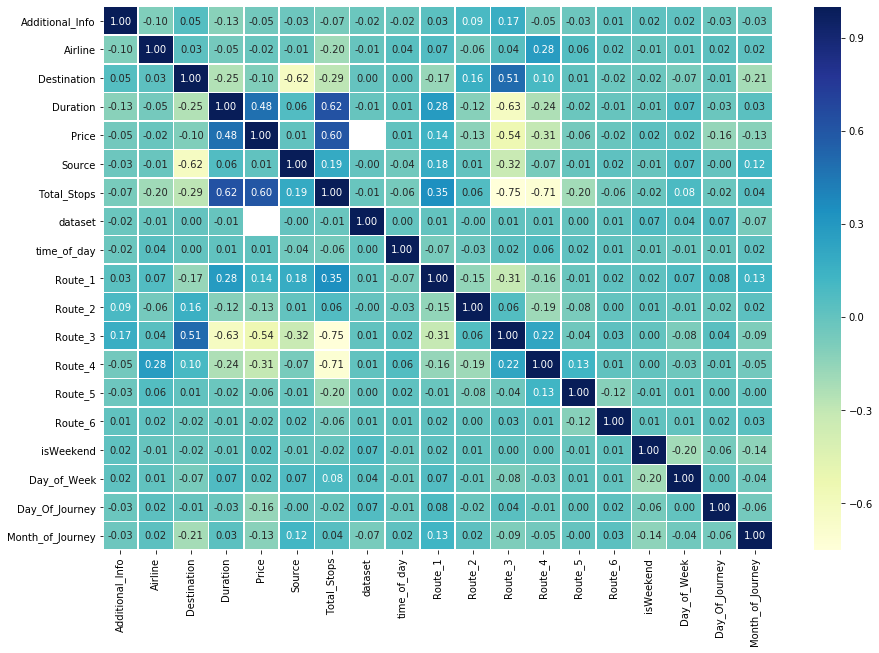

In [54]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling


In [55]:
# Lets seprate the train and test from df ( here dataset= 1 for train) and (dataset=0) for test sets...
# df_train(train) where 1 = train
df_train=df.loc[df["dataset"]==1]
#In df_test(test) where = test
df_test=df.loc[df["dataset"]==0]

In [56]:
#re-indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [57]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Price","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

In [58]:
#lets divide the df_train into input and output
X = df_train.drop("Price", axis=1)

y = df_train["Price"]

In [59]:
# Independent variables (no target column)
X.head()

,Additional_Info,Airline,Destination,Duration,Source,Total_Stops,time_of_day,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,64,1.921812,1.791759,1.343735,0,0,5,0,6.964624,3.218876,144,16,1,0.693147,3,24,1.386294
1,64,0.480453,0.000000,2.130214,3,2,1,4,10.615193,0.693147,9,16,1,0.000000,6,1,1.791759
2,64,2.590290,0.693147,2.995732,2,2,4,9,12.225565,1.609438,25,16,1,0.693147,3,9,1.945910
3,64,1.921812,0.000000,1.858899,3,1,2,4,12.640500,1.386294,144,16,1,0.693147,3,12,1.791759
4,64,1.921812,1.791759,1.749200,0,1,0,0,12.640500,2.197225,144,16,1,0.000000,0,1,1.386294


In [60]:
# Target variable
y


0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10463, dtype: float64

In [61]:
#checking shape of input variable
X.shape

(10463, 17)

In [62]:
#checking shape of target variable
y.shape

(10463,)

In [63]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Additional_Info,Airline,Destination,Duration,Source,Total_Stops,time_of_day,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,0.508398,-0.384395,1.886044,-0.842806,-1.646960,-1.214674,1.431645,-1.315226,0.341755,1.281114,0.383531,0.062369,0.009777,1.551104,-0.080807,1.244539,-1.520598
1,0.508398,-1.390464,-1.291373,0.241088,0.882096,1.813113,-0.797998,-0.355370,1.659191,-2.152208,-2.932677,0.062369,0.009777,-0.644702,1.446263,-1.471890,0.338255
2,0.508398,0.082203,-0.062181,1.433910,0.039077,1.813113,0.874234,0.844449,2.240350,-0.906658,-2.539645,0.062369,0.009777,1.551104,-0.080807,-0.527045,1.044958
3,0.508398,-0.384395,-1.291373,-0.132828,0.882096,0.299219,-0.240588,-0.355370,2.390094,-1.209985,0.383531,0.062369,0.009777,1.551104,-0.080807,-0.172728,0.338255
4,0.508398,-0.384395,1.886044,-0.284010,-1.646960,0.299219,-1.355409,-1.315226,2.390094,-0.107656,0.383531,0.062369,0.009777,-0.644702,-1.607878,-1.471890,-1.520598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,0.508398,-1.725820,-1.291373,-0.968180,0.882096,-1.214674,-0.240588,-0.355370,-1.013087,1.281114,0.383531,0.062369,0.009777,-0.644702,0.937240,-0.527045,-0.497597
10459,0.508398,-1.390464,-1.291373,-0.935751,0.882096,-1.214674,1.431645,-0.355370,-1.013087,1.281114,0.383531,0.062369,0.009777,1.551104,-0.589831,1.598856,-0.497597
10460,0.508398,0.082203,0.656851,-0.784152,-1.646960,-1.214674,0.874234,-1.315226,0.341755,1.281114,0.383531,0.062369,0.009777,1.551104,-0.589831,1.598856,-0.497597
10461,0.508398,2.287611,1.886044,-0.904068,-1.646960,-1.214674,0.874234,-1.315226,0.341755,1.281114,0.383531,0.062369,0.009777,-0.644702,-1.607878,-1.471890,-1.520598


In [64]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [65]:
from xgboost import XGBRegressor

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [66]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 97 is: 0.7522575327093239
max r2 score corresponding to 97 is: 0.06401423297654008
max r2 score corresponding to 69 is: 0.539930927012011
max r2 score corresponding to 75 is: 0.8777148976048519
max r2 score corresponding to 69 is: 0.4898029167332686
max r2 score corresponding to 79 is: 0.8618508974340862
max r2 score corresponding to 69 is: 0.540041307648961
max r2 score corresponding to 69 is: 0.539963990189254
max r2 score corresponding to 69 is: 0.5128605944684348
max r2 score corresponding to 97 is: 0.9228346249971117


{'KNeighborsRegressor': 0.7197998994339354,
 'SVR': 0.037728169492097785,
 'LR': 0.48517509552353866,
 'DecisionTreeRegressor': 0.9951885197230751,
 'RandomForestRegressor': 0.4456225108927364,
 'GradientBoostingClassifier': 0.8359705111536739,
 'Lasso': 0.48517373270054837,
 'Ridge': 0.4851750179351893,
 'ElasticNet': 0.4429201386549032,
 'XGBRegressor': 0.9637695384474901}

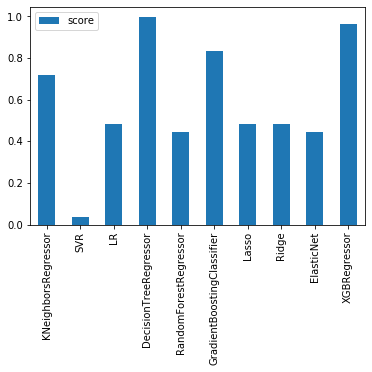

In [67]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [68]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score and errors.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 97 is: 0.7977662132085632
R2 Score :  0.7977662132085632


Cross_val_score= 0.7366493705236097


Mean absolute error= 1254.063770634231


Mean squared error= 3897719.715794961


Root Mean squared error= 1974.26434800281


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 97 is: 0.06401423297654008
R2 Score :  0.06401423297654008


Cross_val_score= 0.042703857960277355


Mean absolute error= 3316.337285083441


Mean squared error= 18039568.143938284


Root Mean squared error= 4247.301277745468


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 69 is: 0.539930927012011
R2 Score :  0.53

In [69]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,79.776621,73.664937,1254.063771,3.897720e+06,1974.264348
1,SVR,6.401423,4.270386,3316.337285,1.803957e+07,4247.301278
2,LinearRegression,53.993093,49.305950,2248.038900,8.518132e+06,2918.583910
3,DecisionTreeRegressor,82.945687,80.153421,752.370337,3.157589e+06,1776.960542
4,RandomForestRegressor,91.265864,88.388096,695.951616,1.852601e+06,1361.102736
5,GradientBoostingRegressor,86.184334,82.913978,1200.537989,2.938707e+06,1714.265621
6,AdaBoostRegressor,55.796019,41.942996,2305.882150,9.695953e+06,3113.832606
7,Lasso,54.004131,49.306916,2247.570823,8.516088e+06,2918.233773
8,Ridge,53.996399,49.306300,2247.954648,8.517520e+06,2918.479036
9,ElasticNet,51.286059,45.345892,2321.143731,9.019336e+06,3003.221020


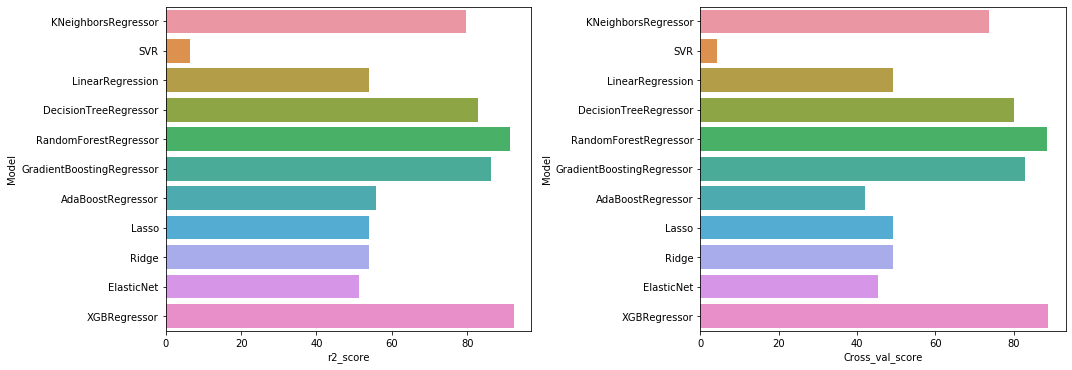

In [70]:
#Plotting bar plot of scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [71]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV


In [72]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500,700, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.0min finished


In [73]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1000}
score: 0.8634049688309174


In [74]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=1000,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=6)
max_random_score(rf)

max r2 score corresponding to 89 is: 0.9204225696281794


89

In [91]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.7s finished


In [92]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 500}
score: 0.8602810982872118


In [77]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 500)
max_random_score(gbr)

max r2 score corresponding to 90 is: 0.9107107402066026


90

In [78]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [79]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 3}
score: 0.8866561359446914


In [93]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.7, gamma= 0.0, learning_rate= 0.15, max_depth= 8, min_child_weight= 3)
max_random_score(xgb)

max r2 score corresponding to 79 is: 0.9327335535877719


79

In [81]:
import lightgbm as lgb
#lets use gridsearchcv to find out best parameters for LGBMRegressor
grid_lgb = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
clflgb =lgb.LGBMRegressor(silent=False)

# Setup GridSearchCV
gs_clflgb = GridSearchCV(estimator=clflgb,
                      param_grid=grid_lgb,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clflgb.fit(x_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.2min finished


In [82]:
# best parameters for LGBMRegressor
print("Best parameter:",gs_clflgb.best_params_)
print("score:",gs_clflgb.best_score_)

Best parameter: {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 200, 'num_leaves': 300}
score: 0.873865158025569


In [94]:
#checking r2 score using best parameters and scores which calculated from gridsearchCV
import lightgbm as lgb

lgbr=lgb.LGBMRegressor(silent=False,learning_rate= 0.1,max_depth= 50, n_estimators= 200, num_leaves= 300)
max_random_score(lgbr)

max r2 score corresponding to 74 is: 0.9207184019326735


74

In [84]:
#using AdaBoostRegressor base_estimator as RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4,random_state=74)
ad=AdaBoostRegressor(base_estimator=rf)
ad.fit(x_train, y_train)
y_predrad = ad.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 87.47%
Mean absolute error: 1047.99
Mean squared error: 2414687.02
Root Mean squared error: 1553.93


{'r2score': 0.87,
 'Mean absolute error': 1047.99,
 'Mean squared error': 2414687.02,
 'Root Mean squared error': 1553.93}

# After all this process conclusion is that XGBRegressor is performing well because of  low rmse and high r2 score(accuracy score)


In [96]:
#Lets make the final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=79)
xgb=XGBRegressor(colsample_bytree= 0.7, gamma= 0.0, learning_rate= 0.15, max_depth= 8, min_child_weight= 3)
xgb.fit(x_train, y_train)
y_predxg = xgb.predict(x_test)
evaluate_preds(y_test,y_predxg)


r2score: 93.06%
Mean absolute error: 728.50
Mean squared error: 1507760.59
Root Mean squared error: 1227.91


{'r2score': 0.93,
 'Mean absolute error': 728.5,
 'Mean squared error': 1507760.59,
 'Root Mean squared error': 1227.91}

Text(0, 0.5, 'Predicted Y')

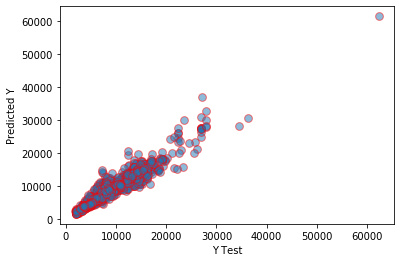

In [88]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predxg,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Getting linear relatipnship means that our model performes well.

In [89]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predxg})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
2596,14571.0,14236.492188
2304,3419.0,4077.975098
6091,10877.0,9899.117188
9305,10943.0,11663.284180
8852,11467.0,11973.148438
...,...,...
5834,5201.0,4876.643066
10532,4804.0,4654.999512
10123,3419.0,4124.367188
8981,3625.0,4082.151611


In [90]:
#lets predict our test set (df_test)
price_pred=xgb.predict(df_test)
price_pred

array([10201.338 ,  7033.8193, 10201.338 , ..., 10714.011 , 22455.074 ,
       10467.647 ], dtype=float32)

## Conclusion:

1) Jet Airways are preferred over others by passengers for travelling.
2) Maximum Journeys are taken place on 6th December,2019
3) Number of counts of Flights Where Destination is Cochin are more.
4) Number of counts of Flights where source is Delhi is more.
5) Number of counts of Flights having only 1 stop are more.
6) Most number of flights are during Morning slot.
7) During Weekdays more number of flights runs.
8) Thursday is the most busiest day for flights.
9) Month May have maximum number of flight counts.
10) Delhi to cochin via Bombay are more flights.
11) After that flights from Banglore to Delhi are more. 
12) More the number of stops more is the flight price.
13) Jet Airways Buisness have more number of flight price.
14) Morning flights have more price.
15) Buisness class have more flight price.
16) Thursday and sunday have more flights thus price is also more.
17) January month have costlier flights.
18) BOM-JDH-Del-HYD and BOM-DED-DEL-HYD have highest price. 
19) Price is more in starting of the month
20) As Duration of the flight increases the price also increases

## Steps Followed: 

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project_17_Flight_Price_submission.csv file.
9) Pickle file is named with Project_17_Flight_price_submission.pkl